## <font color='blue'>  Fait par : CHAIMAA ELALAMI:MSD1 </font>

## Imports

In [9]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [6]:
def solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu):
    row, col = u.shape
    
    ###Assign initial conditions
    # set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    
    
    #fill the update of u
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                  un[i][j] = u[i][j]
        for i in range(1,row - 1):
            for j in range(1,col - 1):
                u[i][j] = un[i][j] + nu * dt / dx**2 * (un[i+1][j] - 2*un[i][j] + un[i - 1][j]) + nu * dt / dy**2 * (un[i][j+1] - 2*un[i][j] + un[i][j-1])
        
    return 0

## Numba accelerator

In [10]:
@njit(fastmath=True)
def solve_2d_diff_numba(u, un, nt, dt, dx, dy, nu):
    row, col = u.shape
    
    ###Assign initial conditions
    # set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    
    
    #fill the update of u
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                  un[i][j] = u[i][j]
        for i in range(1,row - 1):
            for j in range(1,col - 1):
                u[i][j] = un[i][j] + nu * dt / dx**2 * (un[i+1][j] - 2*un[i][j] + un[i - 1][j]) + nu * dt / dy**2 * (un[i][j+1] - 2*un[i][j] + un[i][j-1])
        
        
    return 0

## Pyccel accelerator

In [20]:
@types('float[:,:]','float[:,:]', 'int', 'float','float', 'float' , 'float')
def solve_2d_diff_pyccel(u, un, nt, dt, dx, dy, nu):
    row, col = u.shape
    
    ##Assign initial conditions
    #set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    
    
    #fill the update of u and v
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                  un[i][j] = u[i][j]
        for i in range(1,row - 1):
            for j in range(1,col - 1):
                u[i][j] = un[i][j] + nu * dt / dx**2 * (un[i+1][j] - 2*un[i][j] + un[i - 1][j]) + nu * dt / dy**2 * (un[i][j+1] - 2*un[i][j] + un[i][j-1])
        
        
    return 0

## Inputs

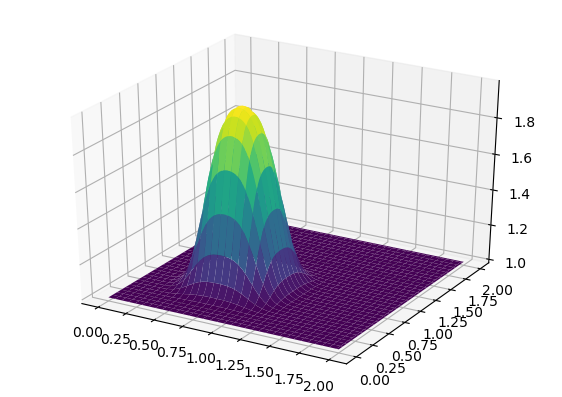

In [12]:
###variable declarations
nt = 51
nx = 101
ny = 101
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
un = np.ones((ny, nx))
    

solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)

## Call Funtions

### Pure function

In [13]:
%timeit solve_2d_diff_pure(u, un, nt, dt, dx, dy, nu)

4.75 s ± 356 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [14]:
%timeit solve_2d_diff_numba(u, un, nt, dt, dx, dy, nu)

3.02 ms ± 289 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [21]:
solve_2d_diff_f90 = epyccel(solve_2d_diff_pyccel)

In [22]:
%timeit solve_2d_diff_f90(u, un, nt, dt, dx, dy, nu)

1.42 ms ± 80.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
